# CML3014N A1 Partners
# 0206989 Low Jing Xuan, 0206325 Chun Her Qi

# Choosen Images
```
easy- IMD018, IMD019
moderate- IMD002, IMD331
difficult - IMD003, IMD006
```

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read image in color

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import cv2
import seaborn as sns

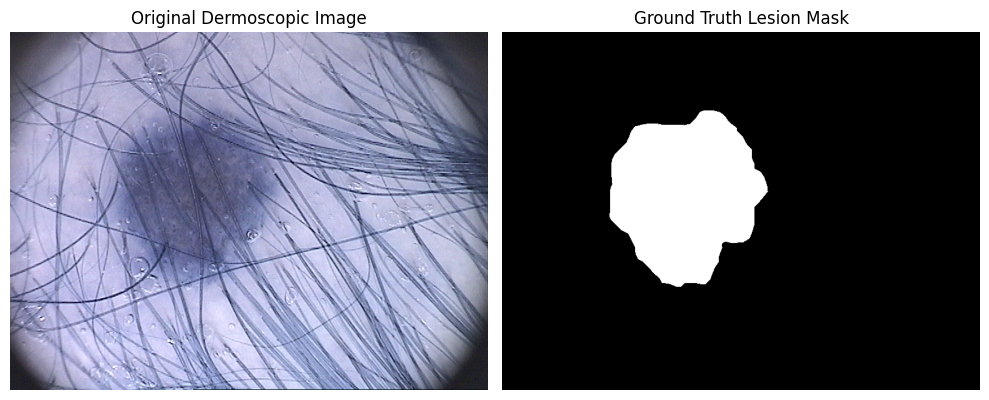

Original Image shape: (574, 765, 3)
Ground Truth shape: (574, 765)


In [3]:
# --- Load image ---
img = cv2.imread('/content/drive/My Drive/MLA1/IMD003/IMD003_Dermoscopic_Image/IMD003.bmp')

# --- Load Ground Truth Mask ---
ground_truth = cv2.imread("/content/drive/My Drive/MLA1/IMD003/IMD003_lesion/IMD003_lesion.bmp", cv2.IMREAD_GRAYSCALE)

# --- Display Both ---
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Dermoscopic Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ground_truth, cmap='gray')
plt.title("Ground Truth Lesion Mask")
plt.axis('off')

plt.tight_layout()
plt.show()

# --- Print image shapes for verification ---
print("Original Image shape:", img.shape)
print("Ground Truth shape:", ground_truth.shape)

(574, 765, 3)


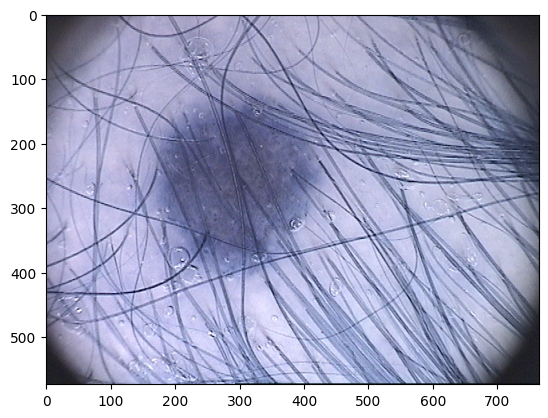

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
print(img.shape)
# plt.axis('off')

# Convert BGR to RGB

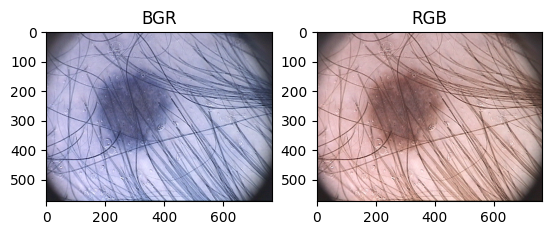

In [5]:
#OpenCV reads in images in BGR format (instead of RGB) because
#when OpenCV was first being developed, BGR color format was popular
#among camera manufacturers and image software providers

# Method 1
rgb_img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Faster way to convert to RGB
plt.subplot(121),plt.imshow(img),plt.title('BGR');
plt.subplot(122),plt.imshow(rgb_img),plt.title('RGB');

## Convert Image into Grey Scale

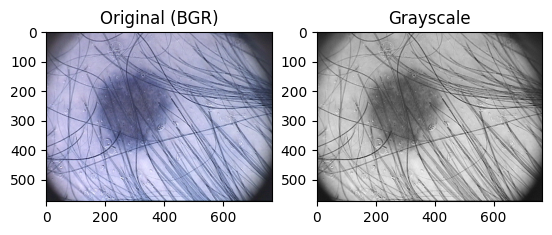

In [6]:
# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display both original and grayscale images
plt.subplot(121), plt.imshow(img), plt.title('Original (BGR)')
plt.subplot(122), plt.imshow(gray_img, cmap='gray'), plt.title('Grayscale')
plt.show()

## Historgram equilization


/tmp/ipython-input-520438130.py:11: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gray_img.ravel(), 256, [0,256], color='gray', alpha=0.5, label='Original')
/tmp/ipython-input-520438130.py:12: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equalized_img.ravel(), 256, [0,256], color='red', alpha=0.5, label='Equalized')


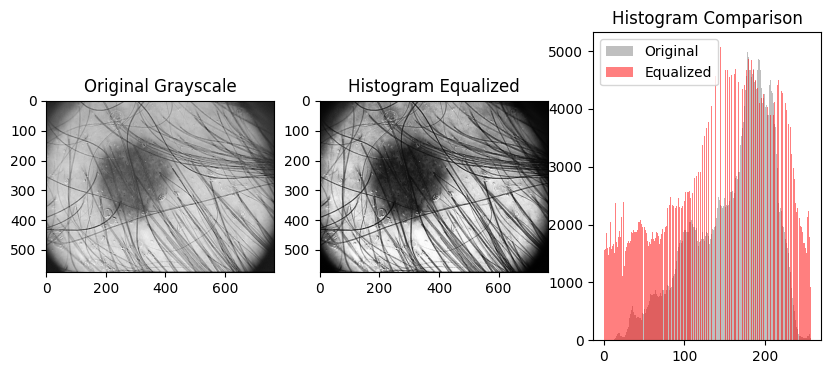

In [7]:
# Apply histogram equalization
equalized_img = cv2.equalizeHist(gray_img)

# Display equalized image and histograms
plt.figure(figsize=(10,4))
plt.subplot(131), plt.imshow(gray_img, cmap='gray'), plt.title('Original Grayscale')
plt.subplot(132), plt.imshow(equalized_img, cmap='gray'), plt.title('Histogram Equalized')

# Optional histogram comparison
plt.subplot(133)
plt.hist(gray_img.ravel(), 256, [0,256], color='gray', alpha=0.5, label='Original')
plt.hist(equalized_img.ravel(), 256, [0,256], color='red', alpha=0.5, label='Equalized')
plt.title('Histogram Comparison')
plt.legend()
plt.show()


# Image Filtering to Remove Noise


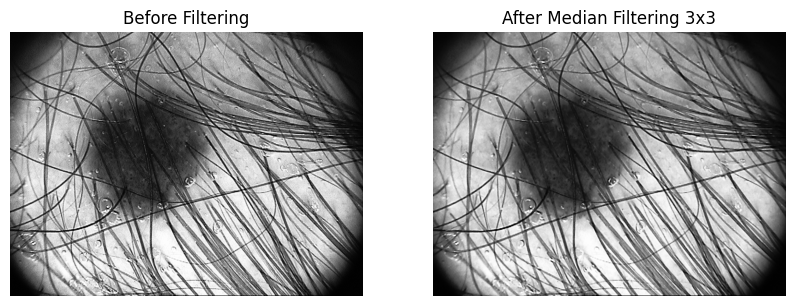

In [8]:
# Image filtering

# Apply median filtering
kernel = 3
smoothedImage = cv.medianBlur(equalized_img, kernel)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(equalized_img, cmap='gray')
plt.title("Before Filtering")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(smoothedImage, cmap='gray')
# plt.title(f"After Median Filtering {kernel}x{kernel}")
plt.title(f"After Median Filtering {kernel}x{kernel}")
plt.axis("off")

plt.show()

## Bottom hat filtering (remove hair)

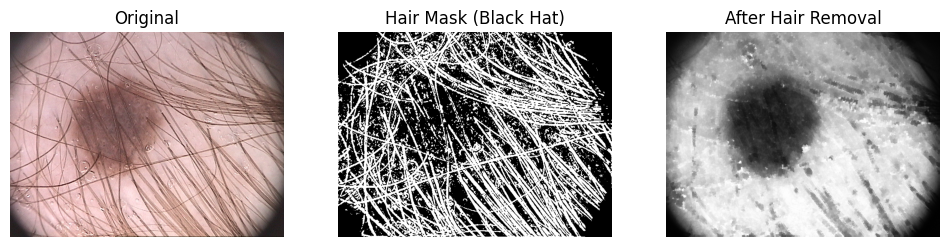

In [9]:
# --- Step 1: Use Black Hat on the median-filtered image ---
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
blackhat = cv2.morphologyEx(smoothedImage, cv2.MORPH_BLACKHAT, kernel)

# --- Step 2: Threshold to create a mask for dark hairs ---
_, hair_mask = cv2.threshold(blackhat, 10, 255, cv2.THRESH_BINARY)

# --- Step 3: Inpaint to remove the detected hairs ---
inpainted = cv2.inpaint(smoothedImage, hair_mask, inpaintRadius=1, flags=cv2.INPAINT_TELEA)

# --- Display results ---
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(hair_mask, cmap="gray")
plt.title("Hair Mask (Black Hat)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(inpainted, cv2.COLOR_BGR2RGB))
plt.title("After Hair Removal")
plt.axis("off")

plt.show()


# Test different KMeans Parameter (For initial testing of K-Means Configuration)

In [10]:
import cv2
import numpy as np
import itertools

# === Representative images for parameter tuning ===
tuning_images = {
    "easy": "/content/drive/My Drive/MLA1/IMD019/IMD019_Dermoscopic_Image/IMD019.bmp",
    "moderate": "/content/drive/My Drive/MLA1/IMD002/IMD002_Dermoscopic_Image/IMD002.bmp",
    "difficult": "/content/drive/My Drive/MLA1/IMD003/IMD003_Dermoscopic_Image/IMD003.bmp"
}

# --- Parameter ranges ---
init_methods = [cv2.KMEANS_RANDOM_CENTERS, cv2.KMEANS_PP_CENTERS]
max_iters = [50, 100, 200]
epsilons = [1.0, 0.1, 0.01]
attempts_list = [5, 10]

# --- Preprocessing function ---
def preprocess_image(img_path):
    # Read image
    img = cv2.imread(img_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Histogram equalization
    equalized_img = cv2.equalizeHist(gray_img)

    # Median filter
    smoothed_img = cv2.medianBlur(equalized_img, 3)

    # Black-hat + threshold + inpaint (hair removal)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
    blackhat = cv2.morphologyEx(smoothed_img, cv2.MORPH_BLACKHAT, kernel)
    _, hair_mask = cv2.threshold(blackhat, 10, 255, cv2.THRESH_BINARY)
    inpainted = cv2.inpaint(smoothed_img, hair_mask, 1, cv2.INPAINT_TELEA)

    return inpainted

# --- Compute compactness for one image ---
def compute_compactness(img_path, k_range, init, max_iter, eps, attempts):
    preprocessed = preprocess_image(img_path)
    pixel_values = np.float32(preprocessed.reshape(-1, 1))

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, max_iter, eps)
    compactness_list = []

    for k in k_range:
        compactness, _, _ = cv2.kmeans(pixel_values, k, None, criteria, attempts, init)
        compactness_list.append(compactness)

    return np.sum(compactness_list)  # sum of compactness over K values

# --- Grid search for best parameters ---
K_range = range(1, 10)
results = []

print("🧩 Evaluating parameter combinations across 3 tuning images...\n")

for init, max_iter, eps, attempts in itertools.product(init_methods, max_iters, epsilons, attempts_list):
    total_compactness = 0
    for label, img_path in tuning_images.items():
        total_compactness += compute_compactness(img_path, K_range, init, max_iter, eps, attempts)

    avg_compactness = total_compactness / len(tuning_images)
    results.append((init, max_iter, eps, attempts, avg_compactness))

    init_name = "RAND" if init == cv2.KMEANS_RANDOM_CENTERS else "PP"
    print(f"Init={init_name:<4} | MaxIter={max_iter:<3} | Eps={eps:<5} | Attempts={attempts:<2} -> Avg Compactness={avg_compactness:.2f}")

# --- Select best configuration ---
best_config = min(results, key=lambda x: x[4])
best_init, best_iter, best_eps, best_attempt, best_score = best_config
init_name = "RAND" if best_init == cv2.KMEANS_RANDOM_CENTERS else "PP"

print("\n✅ BEST CONFIGURATION FOUND ACROSS 3 IMAGES:")
print(f"Initialization: {init_name}")
print(f"Max Iterations: {best_iter}")
print(f"Epsilon: {best_eps}")
print(f"Attempts: {best_attempt}")
print(f"Average Compactness: {best_score:.2f}")



🧩 Evaluating parameter combinations across 3 tuning images...

Init=RAND | MaxIter=50  | Eps=1.0   | Attempts=5  -> Avg Compactness=3664172765.48
Init=RAND | MaxIter=50  | Eps=1.0   | Attempts=10 -> Avg Compactness=3664391570.44
Init=RAND | MaxIter=50  | Eps=0.1   | Attempts=5  -> Avg Compactness=3663164673.55
Init=RAND | MaxIter=50  | Eps=0.1   | Attempts=10 -> Avg Compactness=3661780574.99
Init=RAND | MaxIter=50  | Eps=0.01  | Attempts=5  -> Avg Compactness=3662239891.10
Init=RAND | MaxIter=50  | Eps=0.01  | Attempts=10 -> Avg Compactness=3662120908.71
Init=RAND | MaxIter=100 | Eps=1.0   | Attempts=5  -> Avg Compactness=3665893243.62
Init=RAND | MaxIter=100 | Eps=1.0   | Attempts=10 -> Avg Compactness=3662998972.36
Init=RAND | MaxIter=100 | Eps=0.1   | Attempts=5  -> Avg Compactness=3662803036.89
Init=RAND | MaxIter=100 | Eps=0.1   | Attempts=10 -> Avg Compactness=3662288178.91
Init=RAND | MaxIter=100 | Eps=0.01  | Attempts=5  -> Avg Compactness=3663970225.79
Init=RAND | MaxIter=100 

# Elbow Method to Determine Best K

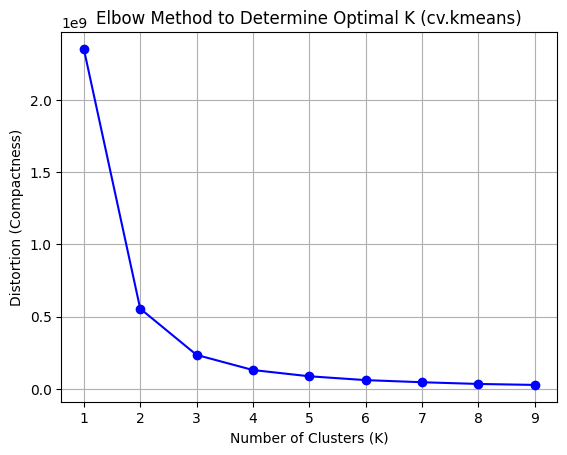


✅ The optimal number of clusters (K) based on the Elbow Method is: 3

ELBOW METHOD EXPLANATION:
--------------------------
- Each point shows the total distance (inertia) between pixels and their cluster centers.
- As K increases, inertia decreases — but at some point, the improvement slows down.
- The 'elbow point' (where the curve bends) indicates the optimal K.



In [11]:
# === ELBOW METHOD: Determine optimal K ===
distortions = []
K_range = range(1, 10)
reshapedImage = np.float32(inpainted.reshape(-1, 1)) #cluster a grey scale image

for k in K_range:
    # Define criteria and apply kmeans()
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.01)

    # Run K-Means
    compactness, labels, centers = cv.kmeans(
        reshapedImage,
        k,
        None,
        criteria,
        10,
        cv.KMEANS_PP_CENTERS
    )

    distortions.append(compactness)  # 'compactness' = sum of squared distances to centers

# Plot Elbow Curve
plt.plot(K_range, distortions, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion (Compactness)')
plt.title('Elbow Method to Determine Optimal K (cv.kmeans)')
plt.grid(True)
plt.show()

# --- Compute curvature to find the elbow point automatically ---
# Normalize distortions to make the curve scale-invariant
x = np.array(list(K_range))
y = np.array(distortions)
y_norm = (y - y.min()) / (y.max() - y.min())

# Calculate the distances between each point and the line connecting first and last
point1 = np.array([x[0], y_norm[0]])
point2 = np.array([x[-1], y_norm[-1]])
distances = np.abs((point2[1] - point1[1]) * x - (point2[0] - point1[0]) * y_norm + point2[0]*point1[1] - point2[1]*point1[0]) / np.sqrt((point2[1] - point1[1])**2 + (point2[0] - point1[0])**2)

# Find K with the maximum distance from the straight line
best_k = x[np.argmax(distances)]

print(f"\n✅ The optimal number of clusters (K) based on the Elbow Method is: {best_k}")

print("""
ELBOW METHOD EXPLANATION:
--------------------------
- Each point shows the total distance (inertia) between pixels and their cluster centers.
- As K increases, inertia decreases — but at some point, the improvement slows down.
- The 'elbow point' (where the curve bends) indicates the optimal K.
""")

In [12]:
# === Function: Apply K-Means and return segmented image ===
def segment_image_kmeans(pixels, k, image_shape):
    pixel_values = np.float32(pixels)

    # Define criteria = (type, max_iter, epsilon)
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.01)

    # Apply KMeans
    compactness, labels, centers = cv.kmeans(
        pixel_values,      # data
        k,                 # number of clusters
        None,              # bestLabels
        criteria,          # termination criteria
        10,                # number of attempts
        cv.KMEANS_PP_CENTERS
    )

    # Convert centers to uint8 (color values)
    centers = np.uint8(centers)

    # Map each pixel to its corresponding center
    segmented_data = centers[labels.flatten()]

    # Reshape back to image shape
    segmented_image = segmented_data.reshape(image_shape)

    return segmented_image

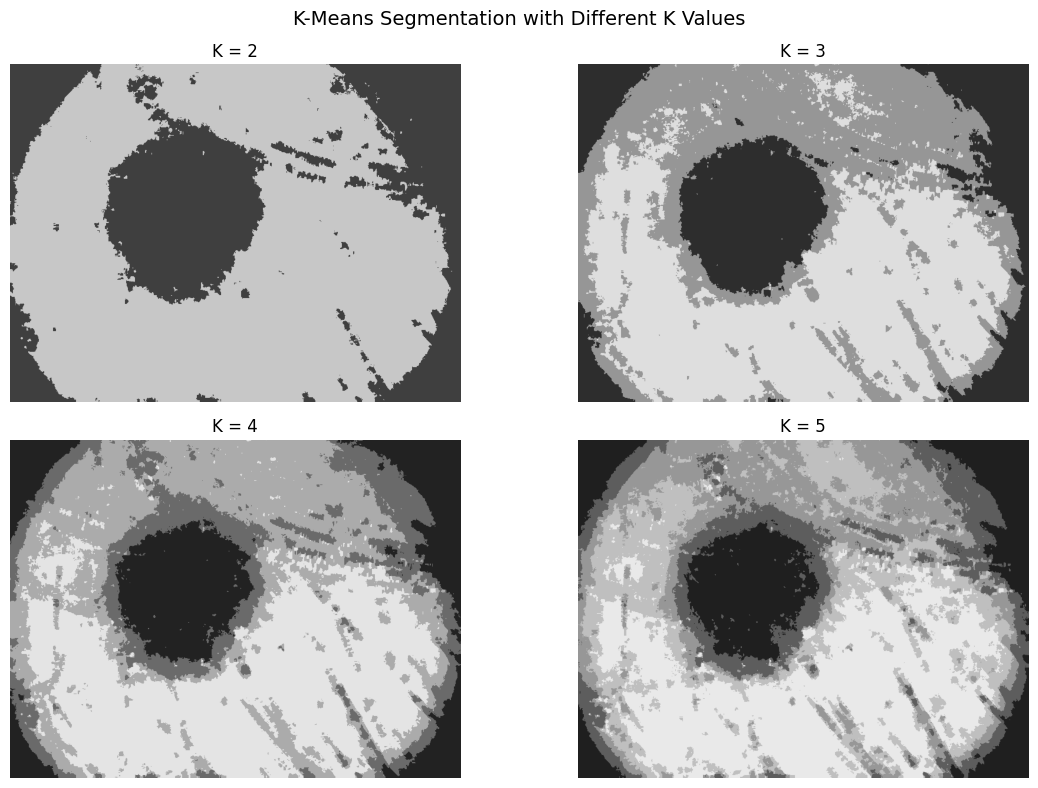

In [13]:
# === Try multiple K values to visualize segmentation ===
K_values = [2, 3, 4, 5]
plt.figure(figsize=(12, 8))
reshapedImage = inpainted.reshape((-1, 1))

for i, K in enumerate(K_values, 1):
    segmented_img = segment_image_kmeans(reshapedImage, K, inpainted.shape)
    plt.subplot(2, 2, i)
    plt.imshow(cv.cvtColor(segmented_img, cv.COLOR_BGR2RGB))
    plt.title(f'K = {K}')
    plt.axis("off")

plt.suptitle("K-Means Segmentation with Different K Values", fontsize=14)
plt.tight_layout()
plt.show()

# Step4: Image segmentation by K-means


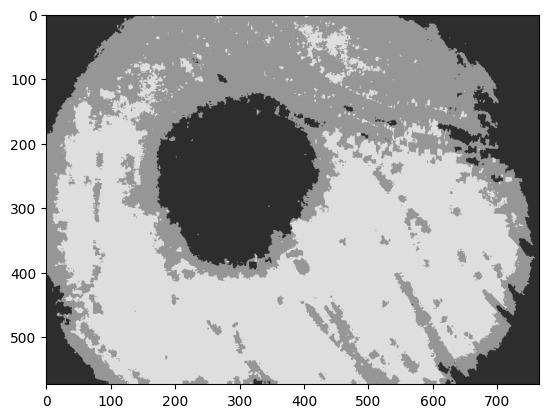

In [14]:
reshapedImage = np.float32(inpainted.reshape(-1, 1))
numberOfClusters = best_k
stopCriteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.01)
ret, labels, clusters = cv.kmeans(reshapedImage, numberOfClusters, None, stopCriteria, 10, cv.KMEANS_PP_CENTERS)

clusters = np.uint8(clusters)

intermediateImage = clusters[labels.flatten()]
clusteredImage = intermediateImage.reshape((inpainted.shape))

screen = cv2.cvtColor(clusteredImage, cv2.COLOR_RGB2BGR)

b,g,r = cv2.split(screen)      # get b, g, r
rgb_img = cv2.merge([r,g,b])   # conver to r, g, b
plt.imshow(rgb_img)


**Convert to binary image**

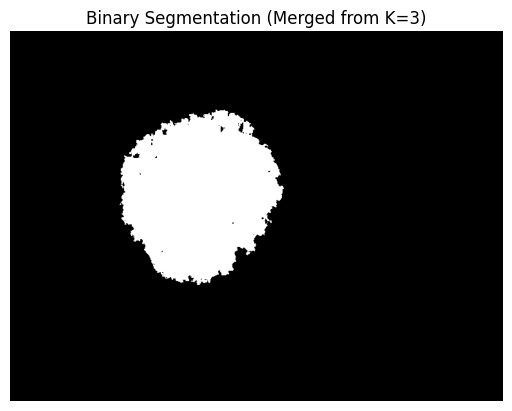

In [15]:
# Reshape labels to match the image shape
binary_mask = labels.reshape((inpainted.shape[0], inpainted.shape[1]))

# === Handle differently depending on best_k ===
if best_k >= 3:
    # Compute mean intensity per cluster
    cluster_means = [np.mean(inpainted[binary_mask == i]) for i in np.unique(binary_mask)]
    # Sort clusters by brightness
    sorted_clusters = np.argsort(cluster_means)
    # Merge the two brightest clusters
    lesion_clusters = sorted_clusters[-2:]
    binary_mask = np.isin(binary_mask, lesion_clusters).astype(np.uint8) * 255
    binary_mask = cv.bitwise_not(binary_mask)
    title_text = 'Binary Segmentation (Merged from K=3)'

elif best_k == 2:
    # Compute mean intensity per cluster
    cluster_means = [np.mean(inpainted[binary_mask == i]) for i in np.unique(binary_mask)]
    # Choose the brighter cluster as lesion
    brightest_cluster = np.argmax(cluster_means)
    binary_mask = (binary_mask == brightest_cluster).astype(np.uint8) * 255
    binary_mask = cv.bitwise_not(binary_mask)
    title_text = 'Binary Segmentation (from K=2)'

else:
    raise ValueError("Only supports best_k = 2 or 3")

# === Optional: keep only the largest white area ===
num_labels, labels_im = cv.connectedComponents(binary_mask)
if num_labels > 1:
    largest_area = 0
    largest_label = 0
    for label in range(1, num_labels):
        area = np.sum(labels_im == label)
        if area > largest_area:
            largest_area = area
            largest_label = label
    binary_mask = np.uint8(labels_im == largest_label) * 255

# === Show result ===
plt.imshow(binary_mask, cmap='gray')
plt.title(title_text)
plt.axis('off')
plt.show()


## Morphological operations
# Erosion, dilation, opening, and closing

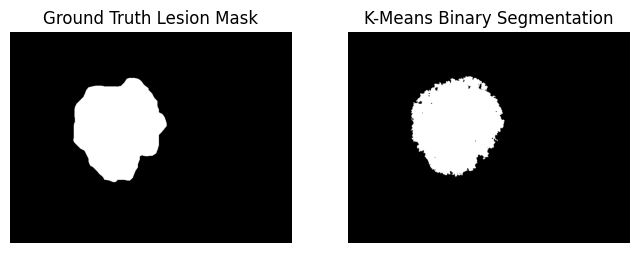


IoU results for different kernel sizes:
Kernel 3x3 - Erosion: IoU = 0.8799
Kernel 3x3 - Dilation: IoU = 0.8998
Kernel 3x3 - Opening: IoU = 0.8948
Kernel 3x3 - Closing: IoU = 0.8974
Kernel 5x5 - Erosion: IoU = 0.8604
Kernel 5x5 - Dilation: IoU = 0.8963
Kernel 5x5 - Opening: IoU = 0.8930
Kernel 5x5 - Closing: IoU = 0.9015
Kernel 7x7 - Erosion: IoU = 0.8385
Kernel 7x7 - Dilation: IoU = 0.8878
Kernel 7x7 - Opening: IoU = 0.8905
Kernel 7x7 - Closing: IoU = 0.9041
Kernel 9x9 - Erosion: IoU = 0.8150
Kernel 9x9 - Dilation: IoU = 0.8775
Kernel 9x9 - Opening: IoU = 0.8891
Kernel 9x9 - Closing: IoU = 0.9048
Kernel 11x11 - Erosion: IoU = 0.7902
Kernel 11x11 - Dilation: IoU = 0.8659
Kernel 11x11 - Opening: IoU = 0.8896
Kernel 11x11 - Closing: IoU = 0.9052

✅ Best Kernel Size: 11x11
✅ Best Operation: Closing
✅ Highest IoU: 0.9052


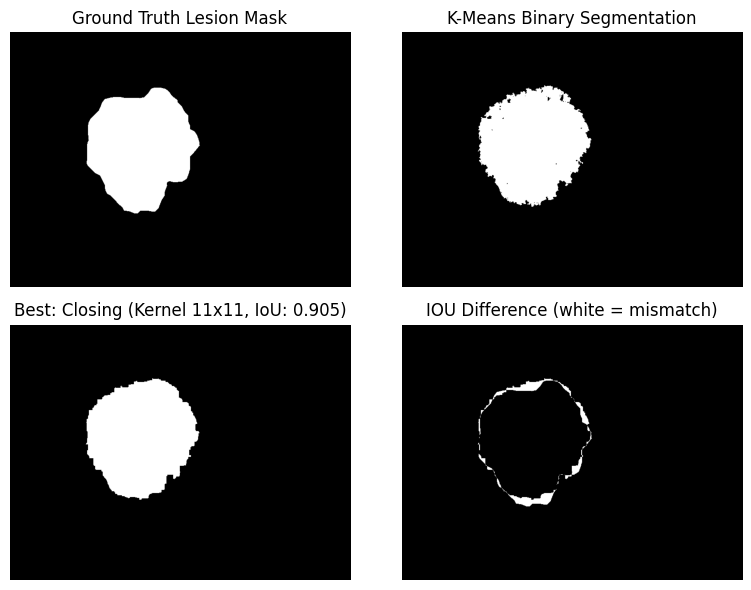

In [16]:
# Resize ground truth to match the binary_mask shape
ground_truth = cv2.resize(ground_truth, (binary_mask.shape[1], binary_mask.shape[0]))

# Ensure both are binary (0 or 255)
binary_mask = cv2.threshold(binary_mask, 127, 255, cv2.THRESH_BINARY)[1]
ground_truth = cv2.threshold(ground_truth, 127, 255, cv2.THRESH_BINARY)[1]

# --- Display Ground Truth and Initial Segmentation ---
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(ground_truth, cmap='gray')
plt.title("Ground Truth Lesion Mask")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_mask, cmap='gray')
plt.title("K-Means Binary Segmentation")
plt.axis('off')
plt.show()

# =====================================================
# --- IoU Calculation Function ---
# =====================================================
def calculate_iou(pred, truth):
    pred_bin = (pred > 127).astype(np.uint8)
    truth_bin = (truth > 127).astype(np.uint8)
    intersection = np.logical_and(pred_bin, truth_bin).sum()
    union = np.logical_or(pred_bin, truth_bin).sum()
    return intersection / union if union != 0 else 0

# =====================================================
# --- Test Different Kernel Sizes and Operations ---
# =====================================================
kernel_sizes = [3, 5, 7, 9, 11]
results = []

for k in kernel_sizes:
    kernel = np.ones((k, k), np.uint8)

    erosion = cv2.erode(binary_mask, kernel, iterations=1)
    dilation = cv2.dilate(binary_mask, kernel, iterations=1)
    opening = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)

    iou_erosion = calculate_iou(erosion, ground_truth)
    iou_dilation = calculate_iou(dilation, ground_truth)
    iou_opening = calculate_iou(opening, ground_truth)
    iou_closing = calculate_iou(closing, ground_truth)

    results.extend([
        (k, 'Erosion', iou_erosion),
        (k, 'Dilation', iou_dilation),
        (k, 'Opening', iou_opening),
        (k, 'Closing', iou_closing)
    ])

# =====================================================
# --- Find the Best IoU Combination ---
# =====================================================
best_k, best_op, best_iou = max(results, key=lambda x: x[2])

# --- Print Summary of All Results ---
print("\nIoU results for different kernel sizes:")
for k, op, val in results:
    print(f"Kernel {k}x{k} - {op}: IoU = {val:.4f}")

print(f"\n✅ Best Kernel Size: {best_k}x{best_k}")
print(f"✅ Best Operation: {best_op}")
print(f"✅ Highest IoU: {best_iou:.4f}")

# =====================================================
# --- Display Best Morphological Result ---
# =====================================================
best_kernel = np.ones((best_k, best_k), np.uint8)

if best_op == 'Erosion':
    best_image = cv2.erode(binary_mask, best_kernel, iterations=1)
elif best_op == 'Dilation':
    best_image = cv2.dilate(binary_mask, best_kernel, iterations=1)
elif best_op == 'Opening':
    best_image = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, best_kernel)
elif best_op == 'Closing':
    best_image = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, best_kernel)

# --- Compute Difference Map (for visualization) ---
difference = cv2.absdiff(ground_truth, best_image)

# --- Display Ground Truth vs Best Result ---
plt.figure(figsize=(8, 6))

# Top-left
plt.subplot(2, 2, 1)
plt.imshow(ground_truth, cmap='gray')
plt.title("Ground Truth Lesion Mask")
plt.axis('off')

# Top-right
plt.subplot(2, 2, 2)
plt.imshow(binary_mask, cmap='gray')
plt.title("K-Means Binary Segmentation")
plt.axis('off')

# Bottom-left
plt.subplot(2, 2, 3)
plt.imshow(best_image, cmap='gray')
plt.title(f"Best: {best_op} (Kernel {best_k}x{best_k}, IoU: {best_iou:.3f})")
plt.axis('off')

# Bottom-right
plt.subplot(2, 2, 4)
plt.imshow(difference, cmap='gray')
plt.title("IOU Difference (white = mismatch)")
plt.axis('off')

plt.tight_layout()
plt.show()

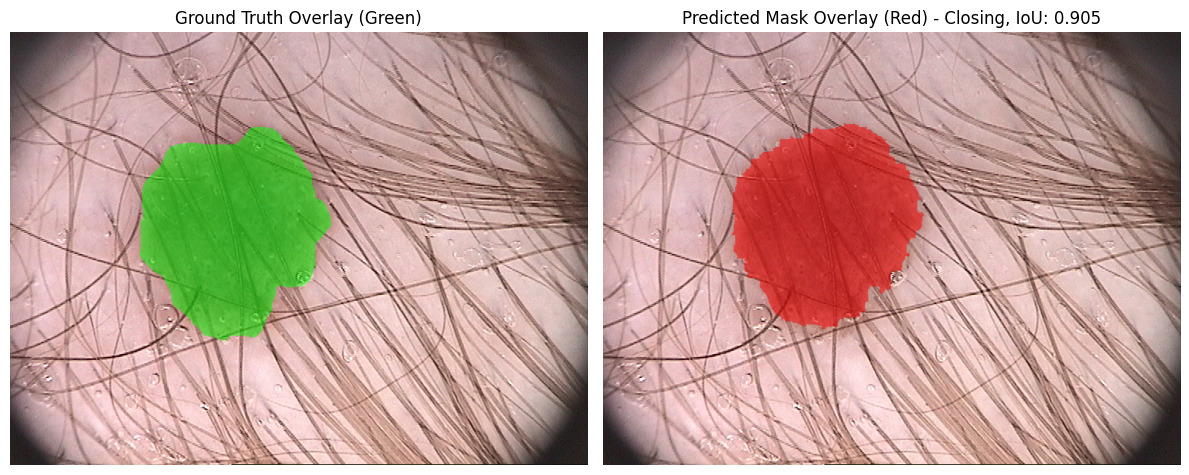

In [17]:

# =====================================================
# --- Overlay Masks on Original Image for Comparison ---
# =====================================================

# Ensure original image is in RGB for correct color display
original_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize masks to match original image size (if needed)
h, w = original_rgb.shape[:2]
gt_resized = cv2.resize(ground_truth, (w, h))
best_resized = cv2.resize(best_image, (w, h))

# Create color overlays
gt_overlay = original_rgb.copy()
pred_overlay = original_rgb.copy()

# Ground truth = green overlay
gt_overlay[gt_resized == 255] = [0, 255, 0]

# Predicted mask = red overlay
pred_overlay[best_resized == 255] = [255, 0, 0]

# Blend with transparency
alpha = 0.5
gt_result = cv2.addWeighted(original_rgb, 1 - alpha, gt_overlay, alpha, 0)
pred_result = cv2.addWeighted(original_rgb, 1 - alpha, pred_overlay, alpha, 0)

# --- Display overlays ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(gt_result)
plt.title("Ground Truth Overlay (Green)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(pred_result)
plt.title(f"Predicted Mask Overlay (Red) - {best_op}, IoU: {best_iou:.3f}")
plt.axis('off')

plt.tight_layout()
plt.show()

# Confusion Matrix


✅ Best Morphological Operation: Closing (Kernel 11x11)
=== Confusion Matrix ===
TP = 47244
TN = 386921
FP = 2313
FN = 2632

=== Performance Metrics ===
Accuracy   : 0.9887
Sensitivity: 0.9472
Specificity: 0.9941
Jaccard    : 0.9052
Dice       : 0.9503


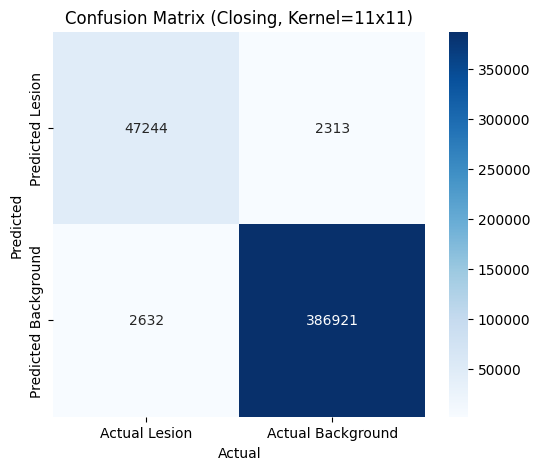

In [18]:
# --- Generate best mask based on best kernel + best operation ---
best_kernel = np.ones((best_k, best_k), np.uint8)

if best_op == 'Erosion':
    best_mask = cv2.erode(binary_mask, best_kernel, iterations=1)
elif best_op == 'Dilation':
    best_mask = cv2.dilate(binary_mask, best_kernel, iterations=1)
elif best_op == 'Opening':
    best_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, best_kernel)
elif best_op == 'Closing':
    best_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, best_kernel)
else:
    raise ValueError("Unknown best operation.")

# --- Ensure binary format ---
best_mask = cv2.threshold(best_mask, 127, 255, cv2.THRESH_BINARY)[1]
ground_truth = cv2.threshold(ground_truth, 127, 255, cv2.THRESH_BINARY)[1]

# --- Flatten both arrays for comparison ---
y_true = (ground_truth.flatten() // 255).astype(np.uint8)
y_pred = (best_mask.flatten() // 255).astype(np.uint8)

# --- Compute Confusion Matrix Components ---
TP = np.sum((y_true == 1) & (y_pred == 1))
TN = np.sum((y_true == 0) & (y_pred == 0))
FP = np.sum((y_true == 0) & (y_pred == 1))
FN = np.sum((y_true == 1) & (y_pred == 0))

# --- Calculate Metrics ---
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
jaccard = TP / (TP + FP + FN) if (TP + FP + FN) != 0 else 0
dice = (2 * TP) / (2 * TP + FP + FN) if (2 * TP + FP + FN) != 0 else 0

# --- Print Metrics ---
print(f"\n✅ Best Morphological Operation: {best_op} (Kernel {best_k}x{best_k})")
print("=== Confusion Matrix ===")
print(f"TP = {TP}")
print(f"TN = {TN}")
print(f"FP = {FP}")
print(f"FN = {FN}")

print("\n=== Performance Metrics ===")
print(f"Accuracy   : {accuracy:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Jaccard    : {jaccard:.4f}")
print(f"Dice       : {dice:.4f}")

# --- Create Confusion Matrix Array for Visualization ---
conf_matrix = np.array([[TP, FP],
                        [FN, TN]])

# --- Plot Confusion Matrix ---
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            yticklabels=['Predicted Lesion', 'Predicted Background'],
            xticklabels=['Actual Lesion', 'Actual Background'])
plt.title(f'Confusion Matrix ({best_op}, Kernel={best_k}x{best_k})')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()
